<a href="https://colab.research.google.com/github/garlic3/ai/blob/main/day10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import os # 운영체제 접근
import sys # 시스템 접근
import requests #웹 접근

client_id = "WoAFVlwBPQXFrFyyCfA1"
client_secret = "Zfn_LnR8Ia"
url = "https://openapi.naver.com/v1/vision/face" # 얼굴감지
# url = "https://openapi.naver.com/v1/vision/celebrity" #유명인 얼굴인식
files = {'image': open('bob.jpg', 'rb')} # 사진이름

headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret': client_secret }
response = requests.post(url,  files=files, headers=headers)

rescode = response.status_code
if(rescode==200):
    print (response.text)
else:
    print("Error Code:" + rescode)

{"info":{"size":{"width":640,"height":411},"faceCount":0},"faces":[]}


In [ ]:
import json
parsed = json.loads(response.text)
type

dict

In [ ]:
parsed.keys()

dict_keys(['info', 'faces'])

In [ ]:
print(parsed['info']['faceCount'])

1


In [ ]:
parsed['faces'][0]

{'age': {'confidence': 0.0164683, 'value': '51~55'},
 'emotion': {'confidence': 0.996441, 'value': 'sad'},
 'gender': {'confidence': 0.612984, 'value': 'child'},
 'landmark': None,
 'pose': {'confidence': 1.0, 'value': 'false_face'},
 'roi': {'height': 227, 'width': 227, 'x': 395, 'y': 523}}

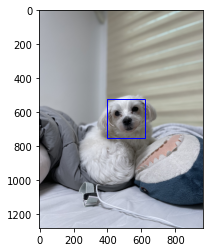

In [ ]:
import matplotlib.patches as patches # 사진(그림) 관련 기본 모듈
import matplotlib.image as mpimg # 사진 읽어오는 모듈
import matplotlib.pyplot as plt # 사진 수정 관련 모듈

img = mpimg.imread('zziro.jpg') # 사진 읽어오기

flg, ax = plt.subplots() # 사진을 표시할 액자와 사진 설정
ax.imshow(img) # 액자에 사진을 삽입
num = parsed['info']['faceCount']
for i in range(num):
  x,y,w,h = parsed['faces'][0]['roi'].values() #인식한 얼굴의 roi 위치정보를 변수로 할당
  re_face = patches.Rectangle((x,y),w,h, facecolor = 'none', edgecolor='b') # 그 위치에 사각형을 표시 정보
  ax.add_patch(re_face) # 기본 사진에 사각형 정보를 올려 수정
# for each in parsed['faces']:
    # x,y,w,h = each['roi'].values()



Text(295, 823, 'child,51~55')

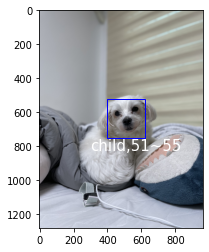

In [ ]:
import matplotlib.patches as patches # 사진(그림) 관련 기본 모듈
import matplotlib.image as mpimg # 사진 읽어오는 모듈
import matplotlib.pyplot as plt # 사진 수정 관련 모듈

img = mpimg.imread('zziro.jpg') # 사진 읽어오기

flg, ax = plt.subplots() # 사진을 표시할 액자와 사진 설정
ax.imshow(img) # 액자에 사진을 삽입
x,y,w,h = parsed['faces'][0]['roi'].values() #인식한 얼굴의 roi 위치정보를 변수로 할당

age, age_conf = parsed['faces'][0]['age'].values()
gender, gender_conf = parsed['faces'][0]['gender'].values()

anno = gender + ',' + age
re_face = patches.Rectangle((x,y),w,h, facecolor = 'none', edgecolor='b') # 그 위치에 사각형을 표시 정보
ax.add_patch(re_face)

plt.text(x-100,y+300, anno, color = 'white', fontsize=15)

In [ ]:
def letter_check(): 
  letter = input('Enter string:')
  # 판별할 문자를 input으로 입력받기
  lower = ''
  # 입력받은 문자에서 소문자만 모아 넣을 빈 문자열 만들기
  upper = ''
  # 입력받은 문자에서 대문자만 모아 넣을 빈 문자열 만들기
  new_letter = ''
  # swap 시킨 문자 모아 넣을 빈 문자열 만들기
  for i in letter:
  # 입력받은 문자에서 글자 하나하나씩 분리하기
    if i.islower():
  # i가 소문자 인가? 참이라면
      lower += i
  # i와 빈 문자열 lower과 합치기
      new_letter += i.upper()
  # 대문자로 바꿔준 후 빈 문자열 new_letter에 합치기
    elif i.isupper():
  # i가 대문자 인가? 참이라면
      upper += i
  # i와 빈 문자열 upper과 합치기 
      new_letter += i.lower()
  # 소문자로 바꿔준 후 빈 문자열 new_letter에 합치기

  print(f'The number of lowercase characters is:{len(lower)}')
  # 소문자 개수는 소문자만 모아서 만든 문자열 lower의 길이로 출력
  print(f'The number of uppercase characters is:{len(upper)}')  
  # 대문자 개수는 대문자만 모아서 만든 문자열 upper의 길이로 출력
  print(f'Swap result: {new_letter}')
  # swap 해준 문자 결과 출력
letter_check()
letter_check()
# 함수 실행해보기

# 아쉬운점 
# 1. swapcase () 함수 생각해볼것
# 2. 굳이 lower과 upper 문자열 만들 필요 없이 정수로 카운팅하는 방식도 좋았을것